Train on 6680 samples, validate on 1670 samples
Epoch 1/20
6680/6680 [==============================] - 3s 424us/sample - loss: 0.7310 - accuracy: 0.5251 - val_loss: 0.6945 - val_accuracy: 0.5269
Epoch 2/20
6680/6680 [==============================] - 1s 190us/sample - loss: 0.6911 - accuracy: 0.5467 - val_loss: 0.6885 - val_accuracy: 0.5431
Epoch 3/20
6680/6680 [==============================] - 2s 225us/sample - loss: 0.6845 - accuracy: 0.5623 - val_loss: 0.6862 - val_accuracy: 0.5551
Epoch 4/20
6680/6680 [==============================] - 2s 229us/sample - loss: 0.6829 - accuracy: 0.5659 - val_loss: 0.6827 - val_accuracy: 0.5647
Epoch 5/20
6680/6680 [==============================] - 1s 224us/sample - loss: 0.6772 - accuracy: 0.5707 - val_loss: 0.6784 - val_accuracy: 0.5719
Epoch 6/20
6680/6680 [==============================] - 1s 214us/sample - loss: 0.6749 - accuracy: 0.5701 - val_loss: 0.6758 - val_accuracy: 0.5659
Epoch 7/20
6680/6680 [==============================] - 2s 226us

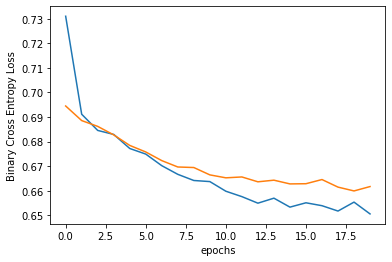

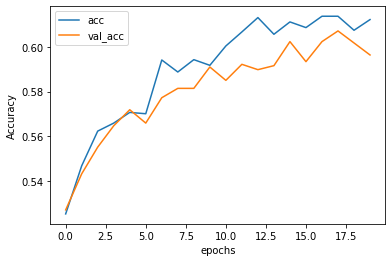

In [46]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import h5py
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from sklearn.utils import shuffle

a=h5py.File('binary_random_sp2020.hdf5','r')
h_ip=a["human"][:]
m_ip=a["machine"][:]


data=np.vstack((m_ip,h_ip))

labels_m = np.zeros([4175,1])
labels_h = np.ones([4175,1])
labels = np.vstack((labels_m,labels_h))

a=np.hstack((data,labels))
a=shuffle(a)


train_data, train_labels = a[:,0:20], a[:,20]
# # # test_data, test_labels = data[7350:8350], labels[7350:8350]

model=keras.Sequential([
    keras.layers.Dense(20),
    keras.layers.Dense(20,activation='relu', kernel_regularizer=regularizers.l2(0.0001), bias_regularizer=regularizers.l2(0.0001)),
    tf.keras.layers.Dropout(0.2),
    keras.layers.Dense(1,activation='sigmoid', kernel_regularizer=regularizers.l2(0.0001), bias_regularizer=regularizers.l2(0.0001))
    
])

model.compile(optimizer='adam',loss= 'binary_crossentropy', metrics=['accuracy'])
result= model.fit(train_data, train_labels, batch_size=16, epochs=20, validation_split=0.2)

model.save('mnist_trained.hdf5')
#results.history is a dictionary
loss = result.history['loss']
val_loss = result.history['val_loss']
acc = result.history['accuracy']
val_acc = result.history['val_accuracy']

epochs = np.arange(len(loss))

plt.figure()
plt.plot(epochs, loss, label='loss')
plt.plot(epochs, val_loss, label='val_loss')
plt.xlabel('epochs')
plt.ylabel('Binary Cross Entropy Loss')
plt.show()

plt.figure()
plt.plot(epochs, acc, label='acc')
plt.plot(epochs, val_acc, label='val_acc')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()


In [42]:
weights, biases= model.layers[0].get_weights()

In [43]:
weights

array([[-9.89613682e-02, -3.20017897e-02,  7.35634193e-02,
         9.40121114e-02, -7.54856542e-02,  1.45217013e-02,
         3.45615774e-01, -1.72429532e-01,  1.68766990e-01,
        -3.32325041e-01,  2.93256491e-01, -2.12143213e-01,
        -1.26282543e-01,  3.70475650e-01, -1.69641495e-01,
         3.85321639e-02,  3.95690918e-01,  4.91093755e-01,
         2.29992680e-02,  2.28331417e-01],
       [ 2.65953153e-01,  1.77015930e-01,  2.37955917e-02,
         5.48424236e-02, -3.94864790e-02,  3.99860889e-01,
         5.65620027e-02,  2.99521834e-01,  1.91548437e-01,
        -3.10978353e-01,  6.68440089e-02, -3.53992507e-02,
        -1.57035694e-01, -2.67067254e-01, -3.24522227e-01,
        -3.53621483e-01, -1.21915258e-01,  4.92833912e-01,
         8.42125267e-02, -1.81652516e-01],
       [ 1.38863996e-01, -1.25732228e-01,  2.28192657e-01,
        -3.48072588e-01,  3.43070745e-01, -7.42385387e-02,
         1.53795406e-01,  2.16982394e-01,  2.38069206e-01,
        -1.60276249e-01, -4.5

In [47]:
print(weights.shape)

(20, 20)
